## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(666)
x = np.random.uniform(-2.0, 2.0, size=100)
X = x.reshape(-1, 1)
y = x**2 + 2*x + 2 + np.random.uniform(size=100)

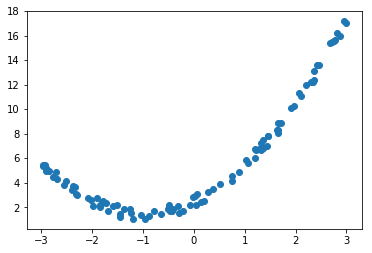

In [30]:
plt.scatter(x, y)
plt.show()

使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.59268183255877638

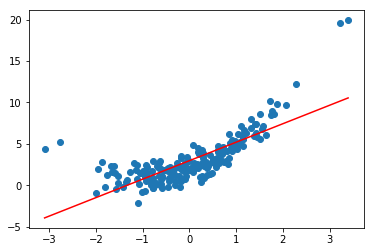

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

使用多项式回归

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X2 = poly2.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
lin_reg2.score(X2, y)

0.87810944727952278

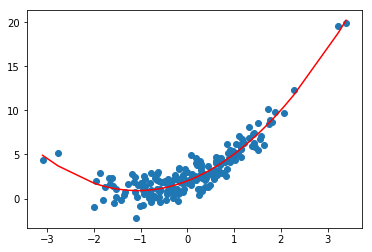

In [7]:
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [8]:
poly10 = PolynomialFeatures(degree=10)
X10 = poly10.fit_transform(X)

lin_reg10 = LinearRegression()
lin_reg10.fit(X10, y)
lin_reg10.score(X10, y)

0.88078978184888401

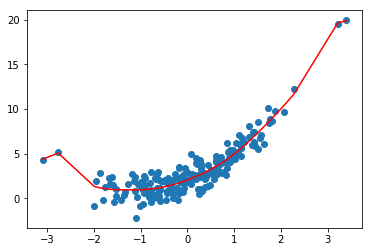

In [9]:
y_predict10 = lin_reg10.predict(X10)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict10[np.argsort(x)], color='r')
plt.show()

In [10]:
poly200 = PolynomialFeatures(degree=200)
X200 = poly200.fit_transform(X)
X200.shape

(200, 201)

In [11]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X200_standard = standardScaler.fit_transform(X200)

lin_reg200 = LinearRegression()
lin_reg200.fit(X200_standard, y)
lin_reg200.score(X200_standard, y)

0.89522158617033587

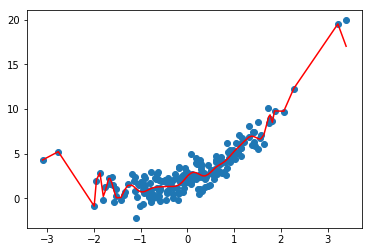

In [12]:
y_predict200 = lin_reg200.predict(X200_standard)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict200[np.argsort(x)], color='r')
plt.show()

### train test split的意义

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.63708205447785027

In [15]:
X2_train = poly2.fit_transform(X_train)
X2_test = poly2.transform(X_test)

lin_reg2.fit(X2_train, y_train)
lin_reg2.score(X2_test, y_test)

0.90488784628320307

In [22]:
X200_train = poly200.fit_transform(X_train)
X200_test = poly200.transform(X_test)

lin_reg200.fit(X200_train, y_train)
lin_reg200.score(X200_test, y_test)

-195644356394930.66

In [23]:
x_test = X_test.reshape(-1)
x_plot = np.linspace(np.min(x_test), np.max(x_test), 500)
X200_plot = poly200.transform(x_plot.reshape(-1,1))
y200_plot = lin_reg200.predict(X200_plot)

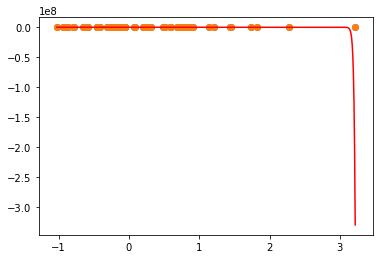

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_plot, y200_plot, color='r')
plt.show()

In [ ]:
X200_train = poly200.fit_transform(X_train)
X200_test = poly200.transform(X_test)

lin_reg200.fit(X200_train, y_train)
lin_reg200.score(X200_test, y_test)